In [20]:
# Este ejemplo se corre con las siguientes versiones
# pd.__version__
# 1.0.2
# sklearn.__version__
# 0.22.1
# matplotlib.__version__
# 3.1.3

# Clase 1

## 2.1 Lectura y análisis exploratorio de datos

#### -Importe (e instale en caso de ser necesario) librería Pandas. 

In [1]:
import pandas as pd

#### -Cargar la base de datos de nombre ejemplo_data.csv. En esta parte recomendamos explorar las diferentes opciones de $read$ que tiene disponible la librería Pandas, identificando los argumentos disponibles en cada una de ellas.

In [2]:
df = pd.read_csv('ejemplo_data.csv')

In [3]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


#### -Identifique los tipos de varibles que hay disponibles en la base de datos (df.types o df.info())

In [4]:
df.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo          int64
dtype: object

#### -Utilizando la función astype transforme el atributo "ID" a entero y el atributo "Activo" a booleano. Vuelva a consultar el estado de las variables.

In [5]:
df["Activo"] = df['Activo'].astype('bool')

In [6]:
df.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo           bool
dtype: object

In [26]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,False


In [8]:
df['Nombre']= df['Nombre'].astype('category')

In [9]:
df.dtypes

ID                int64
Nombre         category
2016             object
2017             object
Crecimiento      object
Unidades         object
fecha            object
Activo             bool
dtype: object

##### -Convierta el atributo "unidades" a entero y "2016" a flotante.


In [10]:
df['2016'].astype('float')

ValueError: could not convert string to float: '$125,000.00'

In [11]:
def convertir(val):
    nuevo_data = val.replace(',','').replace('$', '').replace('%','')
    return float(nuevo_data)

In [12]:
df['2016'] = df['2016'].apply(convertir)
df['2017'] = df['2017'].apply(convertir)
df['Crecimiento'] = df['Crecimiento'].apply(convertir)

In [13]:
df.dtypes

ID                int64
Nombre         category
2016            float64
2017            float64
Crecimiento     float64
Unidades         object
fecha            object
Activo             bool
dtype: object

In [14]:
df['Unidades'].astype('int')

ValueError: invalid literal for int() with base 10: 'No'

In [15]:
pd.to_numeric(df['Unidades'], errors='coerce')

0    500.0
1    700.0
2    125.0
3     75.0
4      NaN
Name: Unidades, dtype: float64

In [16]:
df["Unidades"]  = pd.to_numeric(df['Unidades'], errors='coerce').fillna(2)

In [17]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,162500.0,30.0,500.0,1-10-2015,True
1,552278,Manantial sa,920000.0,1012000.0,10.0,700.0,6-23-2014,False
2,23477,ACME,50000.0,62500.0,25.0,125.0,3-12-2016,True
3,24900,Andes sur,350000.0,490000.0,4.0,75.0,10-28-2015,True
4,651029,San Pablo,15000.0,12750.0,-15.0,2.0,2-15-2014,False


In [18]:
df.dtypes

ID                int64
Nombre         category
2016            float64
2017            float64
Crecimiento     float64
Unidades        float64
fecha            object
Activo             bool
dtype: object

In [19]:
df['fecha']= pd.to_datetime(df['fecha'])

In [20]:
df.dtypes

ID                      int64
Nombre               category
2016                  float64
2017                  float64
Crecimiento           float64
Unidades              float64
fecha          datetime64[ns]
Activo                   bool
dtype: object

## 2.2 Estadísticas descriptivas

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### -Crear un diccionario con 50 datos que contenga al menos tres atributos continuos. 

In [22]:
d = {
   'Edad':[25,26,25,23,30,29,23,34,40,30,51,46],
   'ID':[i for i in range(12)],
    'normal':[np.random.normal() for i in range(12)],
   'Nota':[4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65]
     }

In [23]:
d.keys()

dict_keys(['Edad', 'ID', 'normal', 'Nota'])

In [24]:
d.values()

dict_values([[25, 26, 25, 23, 30, 29, 23, 34, 40, 30, 51, 46], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0.35984469988914347, -0.14231245464051342, 0.9173538892756821, -0.7991301071919331, 0.16591031080294508, -0.6979802983387304, 0.6527998521118278, -0.46939426087674946, -1.149774524997773, 1.5774304083539799, 0.6511522848012048, 0.22144573422374605], [4.23, 3.24, 3.98, 2.56, 3.2, 4.6, 3.8, 3.78, 2.98, 4.8, 4.1, 3.65]])

#### - Transforme dicho diccionario a un dataFrame de Pandas.

In [33]:
df = pd.DataFrame(d)
df.head()
df

,Edad,ID,normal,Nota
0,25,0,0.359845,4.23
1,26,1,-0.142312,3.24
2,25,2,0.917354,3.98
3,23,3,-0.799130,2.56
4,30,4,0.165910,3.20
5,29,5,-0.697980,4.60
6,23,6,0.652800,3.80
7,34,7,-0.469394,3.78
8,40,8,-1.149775,2.98
9,30,9,1.577430,4.80


#### - Obtenga estadísticas descriptivas de tendencia central.

## Media

Valor central de un conjunto de números, específicamente, la suma de los valores dividida por el número de valores.

# $\dfrac{\sum_{i=1}^{n}x_i}{n}$

In [27]:
df['Edad'].mean()

31.833333333333332

## Media aritmética con pesos

Métrica de valor central de un conjunto de números apropiada cuando cada uno de ellos tiene una importancia relativa respecto de los demás datos.

# $\sum_{i=1}^{n}w_ix_i$,
# $\sum_{i=1}^{n}w_i=1$ 

In [28]:
df['pesos'] = [1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,5/20,5/20]
pond_formula = (df['Edad']*df['pesos']).sum()/df['pesos'].sum()
pond_formula

38.5

In [46]:
df['pesos'].sum() 

1.0

In [47]:
promedio_ponderado = np.average(df['Edad'], weights=df['pesos'])
print('Promedio ponderado: ', promedio_ponderado)

Promedio ponderado:  38.5


## Moda, media

In [48]:
df.Edad.mode()

0    23
1    25
2    30
Name: Edad, dtype: int64

In [49]:
df.Nota.median()

3.79

## Rango

Permite evaluar la dispersion de los datos a través de la diferencia entre sus extremos. Su deventaja es que no incorpora información más allá de los valores extremos

In [50]:
df.Nota.min()

2.56

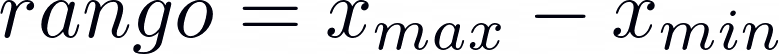


In [51]:
print('rango nota: ', np.round(df.Nota.max()-df.Nota.min(),2))
print('rango edad: ', np.round(df.Edad.max()-df.Edad.min(),2))

rango nota:  2.24
rango edad:  28


#### - Obtenga estadísticas descriptivas de dispersión.

## Varianza

Mide la dispersión de los valores respecto a un valor central (media)

 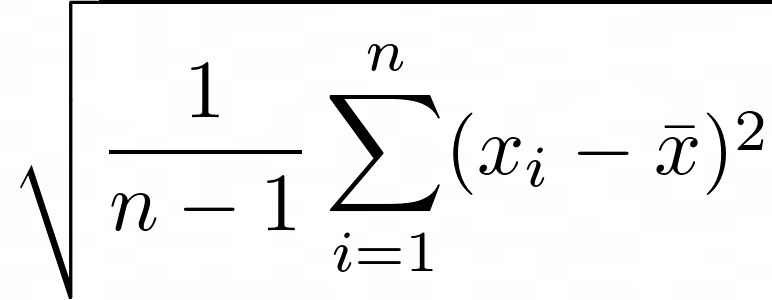

## Desviación estándar

Informa sobre la dispersión de los datos respecto al valor de la media; cuanto mayor sea su valor, más dispersos estarán los datos.

In [52]:
print('desviación estándar nota: ', np.round(df.Nota.std(),2))
print('desviación estándar edad: ', np.round(df.Edad.std(),2))

desviación estándar nota:  0.66
desviación estándar edad:  9.23


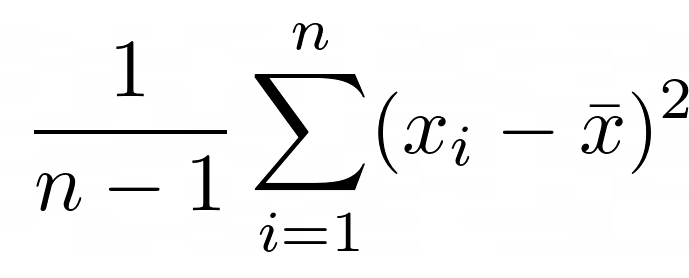

In [53]:
print('Varianza nota: ', np.round(df.Nota.var(),2))
print('Varianza edad: ', np.round(df.Edad.var(),2))

Varianza nota:  0.44
Varianza edad:  85.24


## Cuantil

Para un set de observaciones ordenadas, los cuantiles son puntos que dividen la distribución en intervalos que representan la misma proporción de valores.

In [54]:
df[['Edad', 'Nota']]

,Edad,Nota
0,25,4.23
1,26,3.24
2,25,3.98
3,23,2.56
4,30,3.20
5,29,4.60
6,23,3.80
7,34,3.78
8,40,2.98
9,30,4.80


In [55]:
df[['Edad', 'Nota']].quantile([0.25,0.5,0.75])

,Edad,Nota
0.25,25.0,3.2300
0.50,29.5,3.7900
0.75,35.5,4.1325


<Axes: >

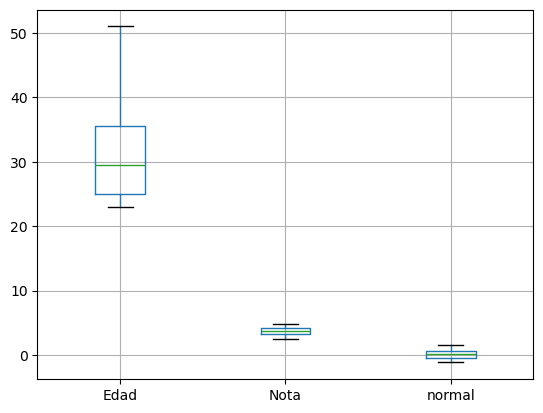

In [29]:
df[['Edad', 'Nota','normal']].boxplot()


In [30]:
df.describe()

,Edad,ID,normal,Nota,pesos
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,31.833333,5.500000,0.107279,3.743333,0.083333
std,9.232682,3.605551,0.794084,0.661628,0.077850
min,23.000000,0.000000,-1.149775,2.560000,0.050000
25%,25.000000,2.750000,-0.526541,3.230000,0.050000
50%,29.500000,5.500000,0.193678,3.790000,0.050000
75%,35.500000,8.250000,0.651564,4.132500,0.050000
max,51.000000,11.000000,1.577430,4.800000,0.250000


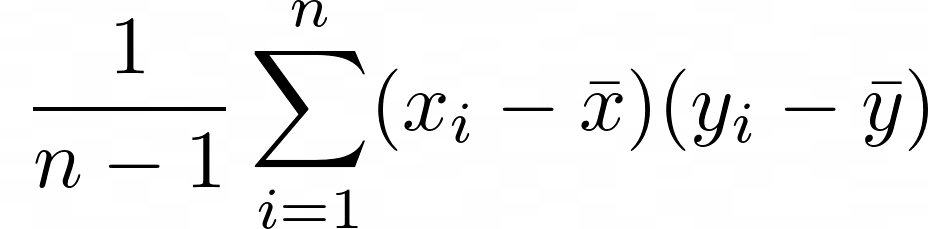

## Covarianza

Indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Permite determinar dependencias y correlacionees.

In [57]:
df.cov()

,Edad,ID,normal,Nota,pesos
Edad,85.242424,26.454545,2.443345,0.357879,0.606061
ID,26.454545,13.000000,0.940789,0.460909,0.181818
normal,2.443345,0.940789,1.217445,0.211113,0.047197
Nota,0.357879,0.460909,0.211113,0.437752,0.004788
pesos,0.606061,0.181818,0.047197,0.004788,0.006061


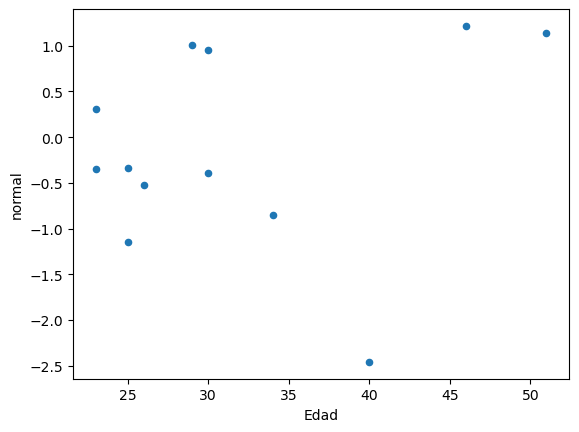

In [58]:
df.plot.scatter(x='Edad', y='normal')
plt.show()

In [59]:
df.corr()

,Edad,ID,normal,Nota,pesos
Edad,1.000000,0.794695,0.239846,0.058586,0.843199
ID,0.794695,1.000000,0.236481,0.193210,0.647750
normal,0.239846,0.236481,1.000000,0.289186,0.549452
Nota,0.058586,0.193210,0.289186,1.000000,0.092955
pesos,0.843199,0.647750,0.549452,0.092955,1.000000


In [60]:
correlation_mat = df.corr()

In [34]:
df.to_csv('new_data.csv')